In [5]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from CollaborativeFiltering import UserBasedCF, ItemBasedCF

In [6]:
with zipfile.ZipFile('/content/movies_small.zip') as zipfile:
    zipfile.extractall()

In [7]:
ratings = pd.read_csv('/content/ml-latest-small/ratings.csv')
movies = pd.read_csv('/content/ml-latest-small/movies.csv')

In [8]:
usercf = UserBasedCF(ratings, 10, 'userId', 'movieId', 'rating', movies)

In [9]:
usercf.recommend(20, 10, 'Cosine')

10/17 01:13:10 PM Start predict rating...
10/17 01:13:10 PM Computing Cosine similarity of the target user and other users...
10/17 01:14:31 PM Done.
10/17 01:15:22 PM Predict rating done. Recommending promising items
10/17 01:15:22 PM These are 10 promising items for the target user 20 


{'Alien Contamination (1980)': 6.155011655011656,
 'Bossa Nova (2000)': 5.950909090909091,
 'Galaxy of Terror (Quest) (1981)': 6.155011655011656,
 'Jetée, La (1962)': 5.630971570787452,
 'Looker (1981)': 5.655011655011656,
 'Master of the Flying Guillotine (Du bi quan wang da po xue di zi) (1975)': 5.655011655011656,
 'Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)': 6.345454545454546,
 'Paterson': 5.845454545454546,
 'Seve (2014)': 5.743537846273897,
 'The Big Bus (1976)': 5.743537846273897}

In [10]:
usercf.recommend(20, 10, 'Pearson')

10/17 01:15:22 PM Start predict rating...
10/17 01:15:22 PM Computing Pearson similarity of the target user and other users...


/content/CollaborativeFiltering.py:101: RuntimeWarning: invalid value encountered in double_scalars
  return numerator/denominator


10/17 01:16:42 PM Done.
10/17 01:16:57 PM Predict rating done. Recommending promising items
10/17 01:16:57 PM These are 10 promising items for the target user 20 


{'20,000 Leagues Under the Sea (1954)': 5.882671104639067,
 'Batman: Mask of the Phantasm (1993)': 5.882671104639067,
 'Before Night Falls (2000)': 5.882671104639067,
 'Beloved (1998)': 5.882671104639067,
 'Cecil B. DeMented (2000)': 5.882671104639067,
 'Mouse Hunt (1997)': 5.882671104639067,
 'My Life in Pink (Ma vie en rose) (1997)': 5.882671104639067,
 'Panic (2000)': 5.882671104639067,
 'U Turn (1997)': 5.882671104639067,
 'Yards, The (2000)': 5.882671104639067}

In [11]:
itemcf = ItemBasedCF(ratings, 10, 'userId', 'movieId', 'rating', movies)

10/17 01:16:57 PM Creating rating matrix
10/17 01:16:58 PM creating centered version of the rating matrix
10/17 01:16:58 PM NumExpr defaulting to 2 threads.


In [12]:
itemcf.recommend(50, 10, 'Pearson')

10/17 01:16:58 PM Start predict rating...
10/17 01:16:58 PM Computing Pearson similarity of the target item and other items...


/content/CollaborativeFiltering.py:101: RuntimeWarning: invalid value encountered in double_scalars
  return numerator/denominator


10/17 01:18:27 PM Done.
10/17 01:19:21 PM Predict rating done. Recommending promising users
10/17 01:19:21 PM These are 10 promising users for the target item 50


{30: 5.0,
 40: 4.793415839119096,
 43: 5.0,
 53: 5.0,
 59: 4.560035790037658,
 67: 4.65491665562058,
 86: 4.282759760189239,
 93: 4.436168681862187,
 98: 4.4570572979190715,
 100: 4.352593646568683}

In [13]:
itemcf.recommend(50, 10, 'AdjustedCosine')

10/17 01:19:21 PM Start predict rating...
10/17 01:19:21 PM Computing AdjustedCosine similarity of the target item and other items...
10/17 01:20:52 PM Done.
10/17 01:21:44 PM Predict rating done. Recommending promising users
10/17 01:21:44 PM These are 10 promising users for the target item 50


{13: 4.999999999999999,
 25: 5.000000000000001,
 30: 4.903983872953547,
 53: 4.999999999999999,
 93: 4.8424948315296925,
 99: 5.0,
 106: 5.0,
 120: 4.999999999999999,
 168: 4.738609840878092,
 171: 4.9023077253263985}

### Compare the predicted rating using Cosine and Pearson similarity

In [14]:
pearson_rating = usercf.predict_ratings(20, 'Pearson')
cosine_rating = usercf.predict_ratings(20, 'Cosine')

sorted_pearson_rating = {k: v for k, v in sorted(pearson_rating.items(), key=lambda item: item[1], reverse=True)}

10/17 01:21:44 PM Start predict rating...
10/17 01:21:59 PM Start predict rating...


In [15]:
pearson_rating_ = [pearson_rating[item] for item in sorted_pearson_rating.keys()]
cosine_rating_ = [cosine_rating[item] for item in sorted_pearson_rating.keys()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Cosine rating'),
 Text(0.5, 0, 'Pearson rating'),
 Text(0.5, 1.0, 'Pearson Rating and Cosine Rating')]

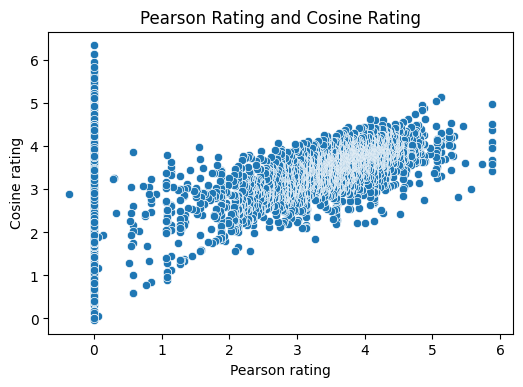

In [16]:
plt.figure(dpi = 100)
plot = sns.scatterplot(pearson_rating_, cosine_rating_)
plot.set(xlabel='Pearson rating', ylabel = 'Cosine rating', title = 'Pearson Rating and Cosine Rating')